<a href="https://colab.research.google.com/github/josemgiraldo/Metodos_Computacionales_taller/blob/main/Laboratorio01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LABORATORIO 1: Caos numérico en un mapa logístico y errores de punto flotante

In [1]:
import numpy as np
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


##1) Ecuación y gráfica de prueba

$$ x_{n+1} = f(x_{n}) = rx_{n}(1-x_{n}) $$

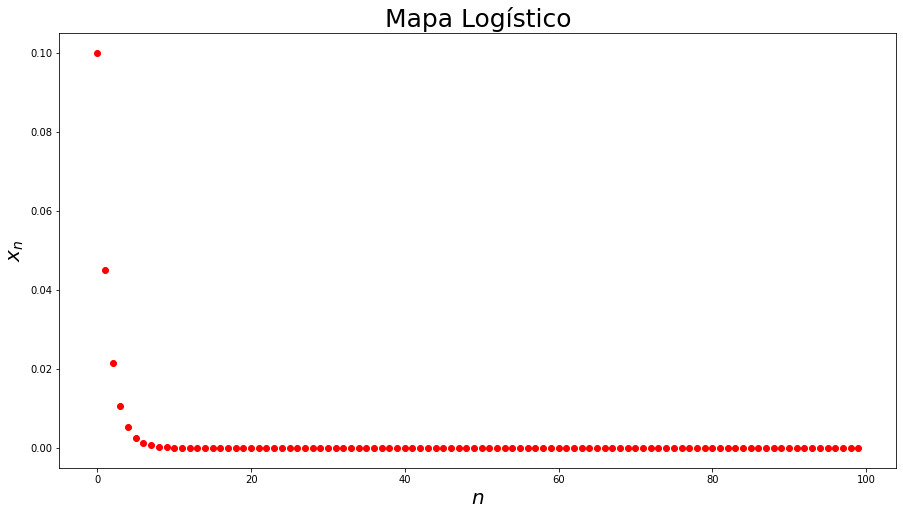

In [2]:
xi=0.1
r=0.5
Np=100
n = np.zeros(Np)
for i in range(len(n)):
  if i == 0:
    n[i] = xi
  else:
    n[i] = r*n[i-1]*(1-n[i-1])

plt.figure(figsize=(15,8))
plt.title('Mapa Logístico', size=25)
plt.xlabel('$n$',size=20)
plt.ylabel('$x_{n}$',size=20) 
plt.plot(np.arange(Np),n,'or')
plt.show()

##2) Prueba con $x_{i} = 0.5$ y diferentes valores de $r$

In [3]:
a=np.arange(100)
def sucesion(r,xi=0.5,Np=100):
  n=np.zeros(Np)
  for i in range(len(n)):
    if i == 0:
      n[i] = xi
    else:
      n[i] = r*n[i-1]*(1-n[i-1])

  return n

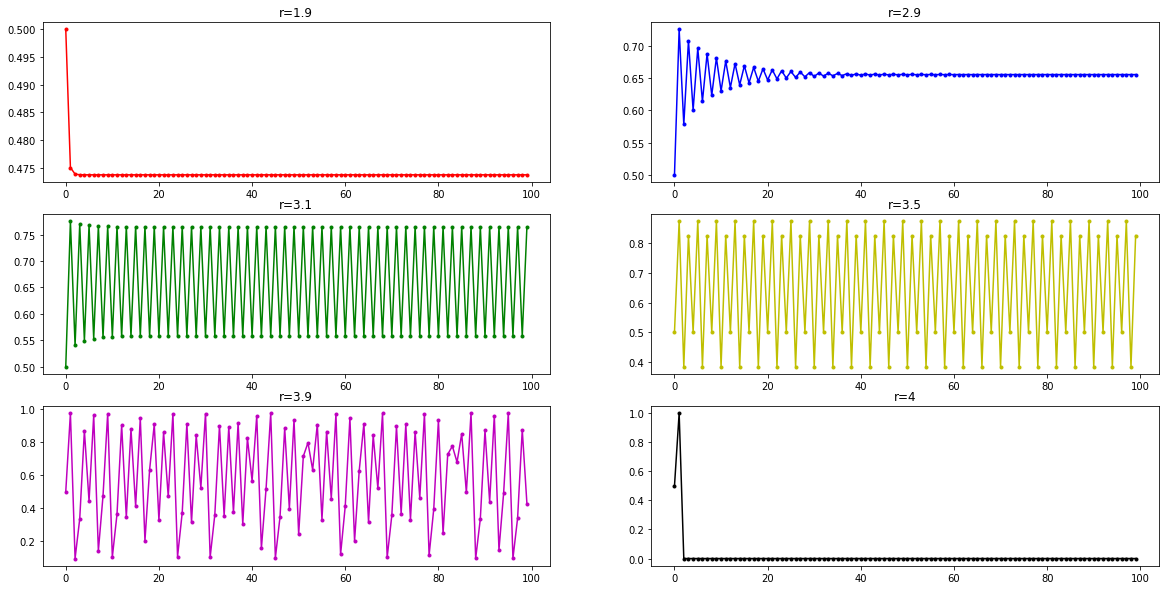

In [4]:
fig, axs = plt.subplots(3, 2)
fig.set_size_inches(20,10)
axs[0,0].plot(a,sucesion(1.9),'.-r')
axs[0,0].set_title('r=1.9')
axs[0,1].plot(a,sucesion(2.9),'.-b')
axs[0,1].set_title('r=2.9')
axs[1,0].plot(a,sucesion(3.1),'.-g')
axs[1,0].set_title('r=3.1')
axs[1,1].plot(a,sucesion(3.5),'.-y')
axs[1,1].set_title('r=3.5')
axs[2,0].plot(a,sucesion(3.9),'.-m')
axs[2,0].set_title('r=3.9')
axs[2,1].plot(a,sucesion(4),'.-k')
axs[2,1].set_title('r=4')
plt.show()

## 3) Evolución en el punto N

In [5]:
def logist_map(r,xi,N=100):
  n=np.zeros(N)
  for i in range(N):
    if i == 0:
      n[i] = xi
    else:
      n[i] = r*n[i-1]*(1-n[i-1])
  return n[-1]

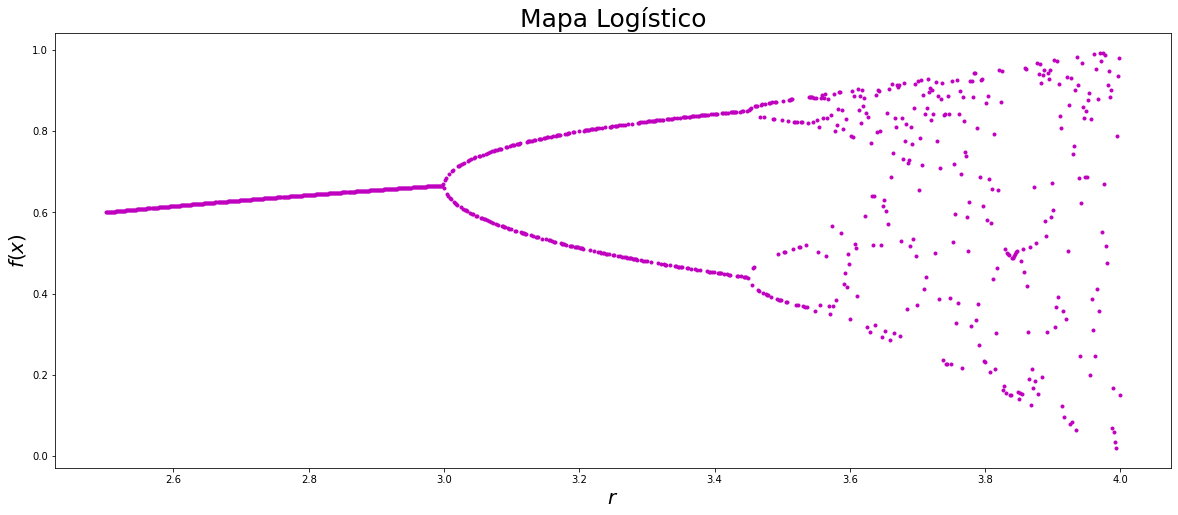

In [6]:
Np = 1000
xf = np.zeros(Np)
r = np.linspace(2.5, 4, Np)

for i in range(Np): 
  xi = np.random.random()
  x_i = logist_map(r = r[i], xi = xi, N = 1000) 
  xf[i] = x_i

plt.figure(figsize=(20,8))
plt.title('Mapa Logístico', size=25)
plt.xlabel('$r$',size=20)
plt.ylabel('$f(x)$',size=20) 
plt.plot(r,xf,'.m')
plt.show()

## 4) Grafica de $r-\frac{1}{r} $

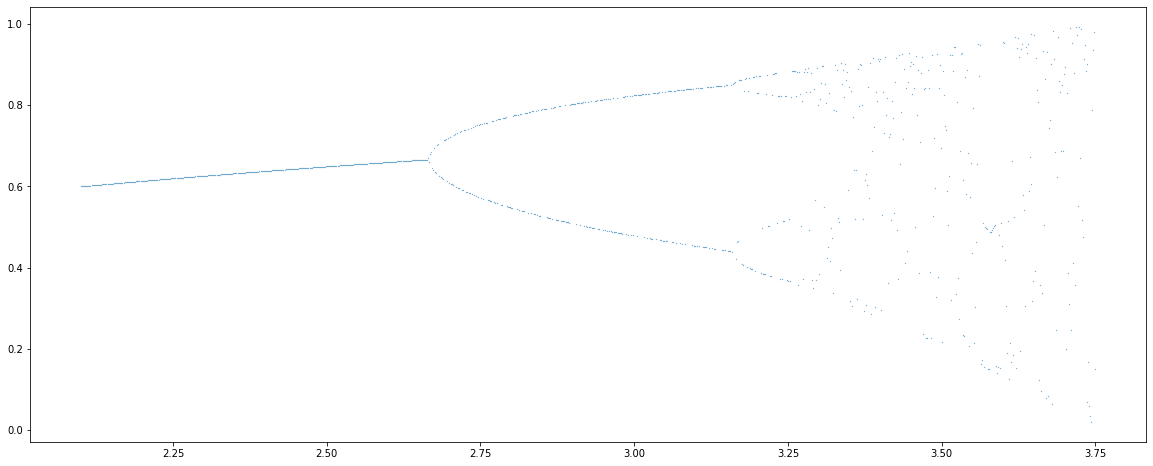

In [14]:
plt.figure(figsize=(20,8))
plt.plot((r-1/r), xf,  ".", markersize = 0.5)
plt.show()

## 5) Formas adicionales de expresar $ f(x) :$
$$ f_{2}(x)=rx_{n-1}-r(x_{n-1})^2 $$
$$ f_{3}(x) = r(x_{n-1})^2[\frac{1}{x_{n-1}}-1] $$

In [8]:
def f2(r,x=0.5,N=100):
  xf=np.zeros(N)
  for i in range(N):
    if i == 0:
      xf[i] = x
    else:
      xf[i] = r*xf[i-1]-r*(xf[i-1])**2
  return xf

def f3(r,x=0.5,N=10):
  xf=np.zeros(N)
  for i in range(N):
    if i == 0:
      xf[i] = x
    else:
      xf[i] = r*((xf[i-2])**2)*((1/(xf[i-1]))-1)
  return xf

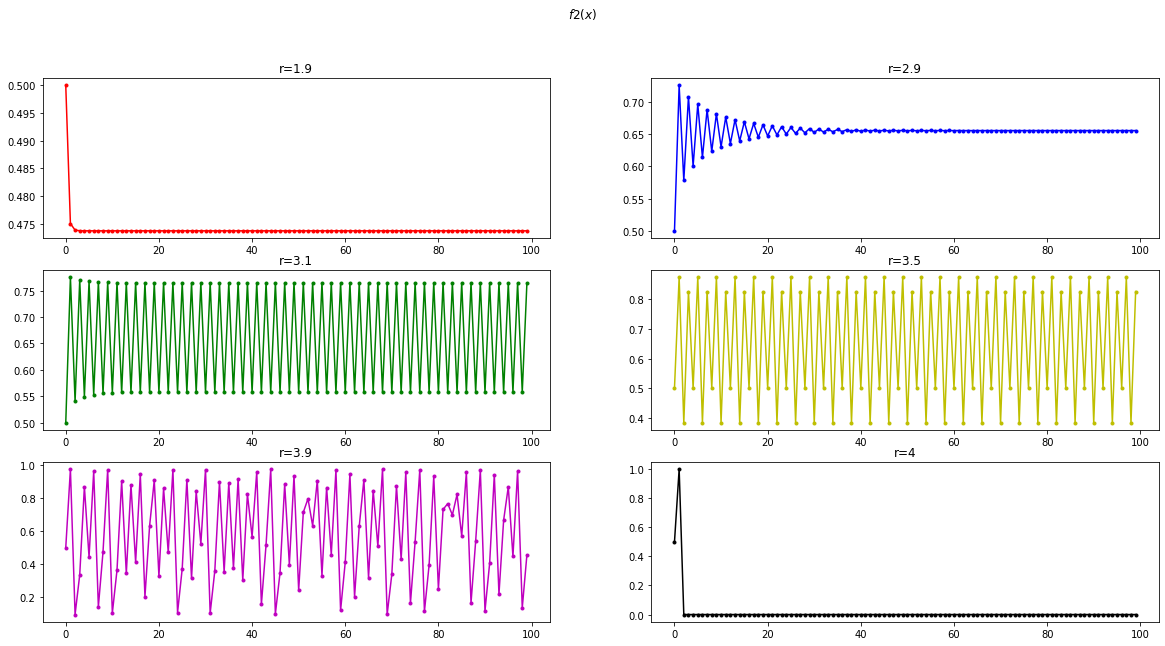

In [17]:
fig, axs = plt.subplots(3, 2)
fig.set_size_inches(20,10)
fig.suptitle('$f2(x)$')
axs[0,0].plot(a,f2(1.9),'.-r')
axs[0,0].set_title('r=1.9')
axs[0,1].plot(a,f2(2.9),'.-b')
axs[0,1].set_title('r=2.9')
axs[1,0].plot(a,f2(3.1),'.-g')
axs[1,0].set_title('r=3.1')
axs[1,1].plot(a,f2(3.5),'.-y')
axs[1,1].set_title('r=3.5')
axs[2,0].plot(a,f2(3.9),'.-m')
axs[2,0].set_title('r=3.9')
axs[2,1].plot(a,f2(4),'.-k')
axs[2,1].set_title('r=4')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


ValueError: ignored

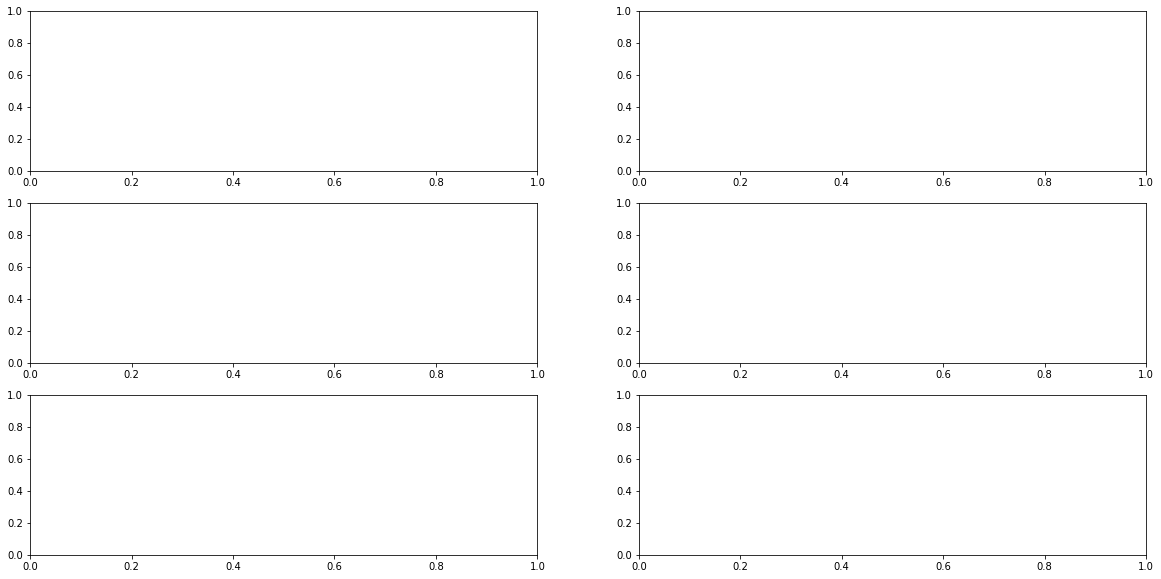

In [10]:
fig, axs = plt.subplots(3, 2)
fig.set_size_inches(20,10)
axs[0,0].plot(a,f3(1.9),'.-r')
axs[0,0].set_title('r=1.9')
axs[0,1].plot(a,f3(2.9),'.-b')
axs[0,1].set_title('r=2.9')
axs[1,0].plot(a,f3(3.1),'.-g')
axs[1,0].set_title('r=3.1')
axs[1,1].plot(a,f3(3.5),'.-y')
axs[1,1].set_title('r=3.5')
axs[2,0].plot(a,f3(3.9),'.-m')
axs[2,0].set_title('r=3.9')
axs[2,1].plot(a,f3(4),'.-k')
axs[2,1].set_title('r=4')
plt.show()

###Conclusión:
Manipulando algebráicamente la expresión original, obtenemnos dos nuevas funciones que para hallar los térmninos de la sucesión recursivamente. Al evaluar la primera expressión:
$$ f(x) = rx_{n-1}-r(x_{n-1})^2 $$ 

no tenemos inconveniente alguno, esto debido a que los términos no tienen ninguna restrición y está definida en todos los Reales. Para la segunda expresión:
$$f(x)=r(x_{n-1})^2[\frac{1}{x_{n-1}}-1] $$ 

se tiene una restricción en el término $\frac{1}{x_{n-1}}$ por una posible división por cero; como es muy posible que en varios de los puntos la sucesión tienda a cero o, incluso sea cero las gráficas resultantes de esta forma de expresar la función no se muestran.